# MVP Análise de Dados e Boas Práticas

**Nome:** Geovane Santos do Rego

**Dataset:** [Obesity Dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

## Definição do Problema

### **Descrição**

O dataset escolhido reúne informações sobre hábitos alimentares e condições físicas de indivíduos provenientes do México, Peru e Colômbia.
O objetivo principal é classificar o nível de obesidade de cada indivíduo com base nesses dados.
Os níveis possíveis de obesidade são:
*   Peso Insuficiente (Insufficient_Weight)
*   Peso Normal (Normal_Weight)
*   Sobrepeso Nível I (Overweight_Level_I)
*   Sobrepeso Nível II (Overweight_Level_II)
*   Obesidade Tipo I (Obesity_Type_I)
*   Obesidade Tipo II (Obesity_Type_II)
*   Obesidade Tipo III (Obesity_Type_III)

Além disso, é importante destacar que 77% dos registros foram gerados sinteticamente usando a ferramenta Weka em conjunto com o filtro SMOTE (Synthetic Minority Over-sampling Technique), para aumentar a quantidade de exemplos de classes menos representadas. Os outros 23% dos dados foram coletados diretamente de usuários reais, por meio de uma plataforma web.

### **Hipóteses do Problema**

Com base em uma análise inicial dos dados, levantam-se as seguintes hipóteses:

*   Indivíduos com hábitos alimentares inadequados e condições físicas
desfavoráveis apresentam maior probabilidade de ter níveis mais elevados de obesidade.
*   Existe uma correlação entre gênero, faixa etária e nível de obesidade.
*   Há uma relação entre o consumo de álcool e os níveis de obesidade.


### **Tipo de Problema**

Este é um problema de **classificação supervisionada**, pois, dado um conjunto de características dos indivíduos (como Gender, Age, Height, entre outras), o objetivo é prever o nível de obesidade de cada pessoa, representado pela variável-alvo NObeyesdad (Nível de Obesidade).

### **Seleção de Dados**

Na seleção dos dados, foram impostas algumas restrições para garantir a relevância e a qualidade do dataset. Entre essas restrições, destacam-se a escolha de um problema de classificação e a sua aplicação na área da saúde e medicina.

Essa escolha foi motivada pela importância social do tema obesidade, que representa um dos maiores desafios de saúde pública atualmente, além da disponibilidade de variáveis relacionadas a hábitos de vida, o que torna o problema adequado para análises preditivas na área da saúde.

### **Atributos do Dataset**

O dataset contém 17 atributos e 2.111 registros. Antes de carregá-lo, selecionei aleatoriamente 5 registros adicionais para simulação, com o objetivo de testar a acurácia do modelo em dados novos. Dessa forma, o conjunto de dados é composto por dois arquivos:

*   Um arquivo com 2.106 registros reais
*   Um arquivo com 5 registros reservados para simulação.

### **Atributos**
 - Gender - Categórico - Male/Female - Genero do indivíduo.
 - Age - Contínuo - Idade do indivíduo.
 - Height - Contínuo - Altura do indivíduo.
 - Weight - Contínuo - Peso do indivíduo.
 - family_history_with_overweight - Binário - Algum membro da família do indivíduo já sofreu ou sofre de sobrepeso?
 - FAVC - Binário - O indivíduo consome alimentos altamente calóricos com frequência?
 - FCVC - Inteiro - O indivíduo costuma comer vegetais nas suas refeições?
 - NCP - Contínuo - Quantas refeições principais o indivíduo faz diariamente?
 - CAEC - Categórico - no/Sometimes/Frequently/Always - O indivíduo consome algum alimento entre as refeições?
 - SMOKE - Binário - O indivíduo fuma?
 - CH2O - Contínuo - Quanto de água o indivíduo bebe diariamente?
 - SCC - Binário - O indivíduo monitora as calorias que consome diariamente?
 - FAF	- Contínuo - Com que frequência o indivíduo pratica atividade física?
 - TUE	- Inteiro - Quanto tempo o indivíduo utiliza dispositivos tecnológicos, como celular, videogames, televisão, computador e outros?
 - CALC - Categórico - no/Sometimes/Frequently/Always - Com que frequência o indivíduo consome álcool?
 - MTRANS - Categórico - Public_Transportation,Walking,Automobile,Motorbike,Bike - Qual meio de transporte o indivíduo costuma usar?
 - NObeyesdad - Categórico - Insufficient_Weight/Normal_Weight/Overweight_Level_I/Overweight_Level_II/Obesity_Type_I/Obesity_Type_II/Obesity_Type_III - Nível de obesidade do indivíduo

## Importação das Bibliotecas Necessárias e Carga de Dados


Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Obesity.

In [10]:
# 1) Import de bibliotecas

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports de bibliotecas de manipulação de dados
import pandas as pd  # Manipulação de dados em tabelas
import numpy as np   # Funções matemáticas e arrays

# Imports para visualização
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações
import seaborn as sns

# Imports para pré-processamento
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV  # Particionamento dos dados e validação cruzada
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
# 2) Carga do DataSet por url

# url a importar
url_dados = 'https://raw.githubusercontent.com/geovane186/MVP_Data_Analysis_Obesity_Levels/refs/heads/main/DataSet/ObesityDataSet_raw_and_data_sinthetic_training.csv'

# Carga do dataset através do csv
obesityDataSet = pd.read_csv(url_dados)

# Verifica o tipo de obesityDataSet
print('Classe do DataSet:',type(obesityDataSet), '\n')

# Exibe as 5 primeiras linhas
print(obesityDataSet.head(), '\n')

Classe do DataSet: <class 'pandas.core.frame.DataFrame'> 

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportat

## Análise de Dados

### **Total e Tipo das Instâncias**

O dataset utilizado possui um total de 2.106 instâncias (registros) e 17 atributos (colunas), sendo 16 variáveis independentes (características do indivíduo) e 1 variável dependente (NObeyesdad), que representa o nível de obesidade — alvo do problema de classificação.

A análise do tipo de dados mostrou que:

*   8 atributos são do tipo numérico contínuo (float64): Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE.
*   9 atributos são do tipo categórico (object): Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS e NObeyesdad (variável alvo).

Além disso, todos os atributos apresentam 100% de preenchimento (sem valores nulos), o que indica boa qualidade inicial dos dados do ponto de vista de completude.

In [12]:
# 3) Checar total e tipo das instancias do dataset, e valores nulos

# Verificar total e tipo das instancias
print(f"Total de instâncias: {len(obesityDataSet)}")
print("\nTipos de dados por coluna:")
print(obesityDataSet.info())

# Verificar valores faltantes
print("\nChecagem de nulos:")
print(obesityDataSet.isnull().sum())

# Verificar valores únicos por coluna categórica
print("\nChecagem de valores inconsistentes:")
for col in obesityDataSet.select_dtypes(include='object').columns:
    print(f'\nColuna: {col}')
    print(obesityDataSet[col].unique())

Total de instâncias: 2106

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2106 non-null   object 
 1   Age                             2106 non-null   float64
 2   Height                          2106 non-null   float64
 3   Weight                          2106 non-null   float64
 4   family_history_with_overweight  2106 non-null   object 
 5   FAVC                            2106 non-null   object 
 6   FCVC                            2106 non-null   float64
 7   NCP                             2106 non-null   float64
 8   CAEC                            2106 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2106 non-null   float64
 11  SCC                             2106 non-

### **Distribuição de frequência das classes**

A variável-alvo NObeyesdad apresenta sete categorias, que representam diferentes níveis de obesidade dos indivíduos. A distribuição é relativamente equilibrada, mas com algumas variações perceptíveis entre as classes.

Observa-se que não há classes extremamente desbalanceadas, o que é desejável para problemas de classificação supervisionada. No entanto, as classes Obesity_Type_I, Obesity_Type_III e Obesity_Type_II concentram aproximadamente 46% dos registros, indicando uma maior representatividade de indivíduos com níveis mais elevados de obesidade.

Já a classe Insufficient_Weight é a menos representada, com cerca de 12,92% do total, o que não representa um desbalanceamento crítico, mas pode ser considerado ao avaliar métricas como acurácia por classe, recall ou F1-score.

Essa distribuição reflete o objetivo do dataset de conter um número mais uniforme de registros por classe, devido ao uso do SMOTE, o que ajuda a treinar modelos mais robustos e evita viés para classes majoritárias.

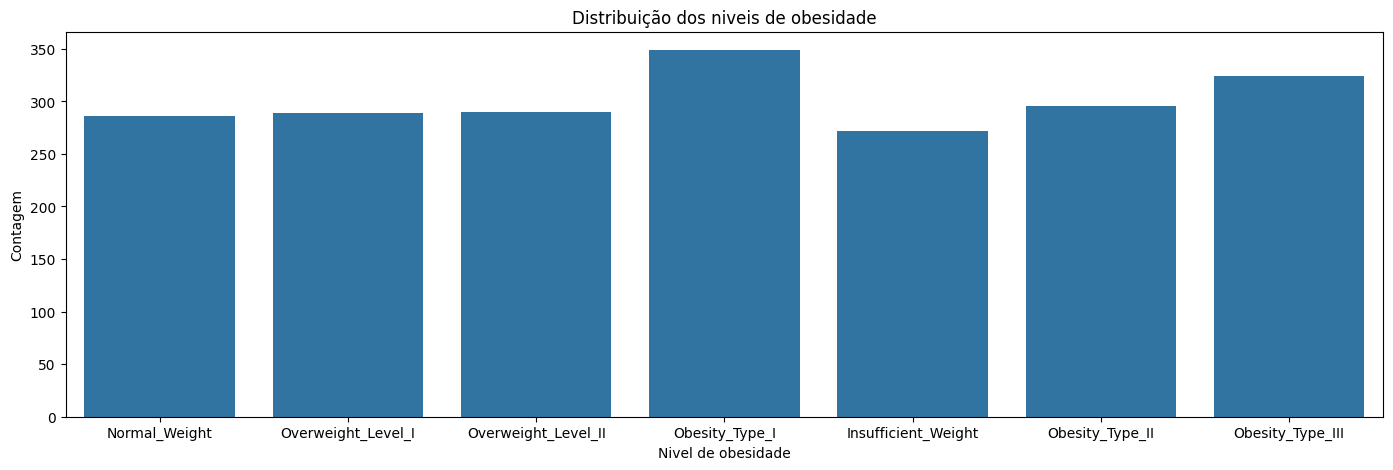

                     Contagem  Porcentagem (%)
NObeyesdad                                    
Obesity_Type_I            349            16.57
Obesity_Type_III          324            15.38
Obesity_Type_II           296            14.06
Overweight_Level_II       290            13.77
Overweight_Level_I        289            13.72
Normal_Weight             286            13.58
Insufficient_Weight       272            12.92


In [13]:
# 4) Checar balanceamento das classes

# gráfico de barras simples
plt.figure(figsize=(17, 5))
sns.countplot(x='NObeyesdad', data=obesityDataSet)
plt.title('Distribuição dos niveis de obesidade')
plt.xlabel('Nivel de obesidade')
plt.ylabel('Contagem')
plt.show()

# Frequência absoluta e relativa
class_counts = obesityDataSet['NObeyesdad'].value_counts()
class_percent = obesityDataSet['NObeyesdad'].value_counts(normalize=True) * 100

class_distribution = pd.DataFrame({
    'Contagem': class_counts,
    'Porcentagem (%)': class_percent.round(2)
})

print(class_distribution)

### **Estatísticas Descritivas**

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [15]:
# 5) Estatísticas descritivas básicas do dataset
obesityDataSet.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,24.318053,1.701817,86.601262,2.420038,2.686306,2.008105,1.011125,0.656893
std,6.350780,0.093336,26.204266,0.533279,0.776638,0.613017,0.850449,0.608506
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.946718,1.630000,65.620230,2.000000,2.660328,1.582010,0.128393,0.000000
50%,22.771307,1.700684,83.000000,2.387797,3.000000,2.000000,1.000000,0.625215
75%,26.000000,1.768557,107.540388,3.000000,3.000000,2.478129,1.666821,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### **Observações e insights iniciais:**

*   Idade (Age): varia de 14 a 61 anos, com média de aproximadamente 24 anos. A
baixa mediana sugere uma maioria de adultos jovens.
*   Altura (Height): valores entre 1,45 m e 1,98 m, com distribuição relativamente coerente.
*   Peso (Weight): varia de 39 kg a 173 kg — um intervalo amplo, mas coerente com o objetivo de abranger diferentes níveis de obesidade.
*   Consumo de vegetais (FCVC): concentra-se entre 1 e 3 (escala esperada), com média em torno de 2,4 — indicando consumo moderado.
*   Número de refeições principais (NCP): varia entre 1 e 4, com mediana de 3 refeições por dia, coerente com hábitos gerais.
*   Consumo de água (CH2O): entre 1 e 3 litros por dia, mediana em 2 — dentro de um padrão esperado.
*   Atividade física (FAF): varia de 0 (nenhuma) a 3 (alta frequência), com média em torno de 1 — sugerindo baixa atividade física para parte significativa dos registros.
*   Tempo de uso de eletrônicos (TUE): entre 0 e 2 horas, média de ~0,65 hora — esse valor parece baixo, pode indicar respostas subestimadas ou escalas diferentes.

Em resumo, de forma geral, os valores parecem consistentes com o tema do dataset. Entretanto, na etapa de visualizações, vamos investigar outliers com boxplots ou histogramas para validar a qualidade dos dados extremos.

#### **Média**

Vamos utilizar um gráfico de barras simples que é ótimo para mostrar a média de cada variável numérica, uma vez que, fica fácil comparar valores lado a lado.

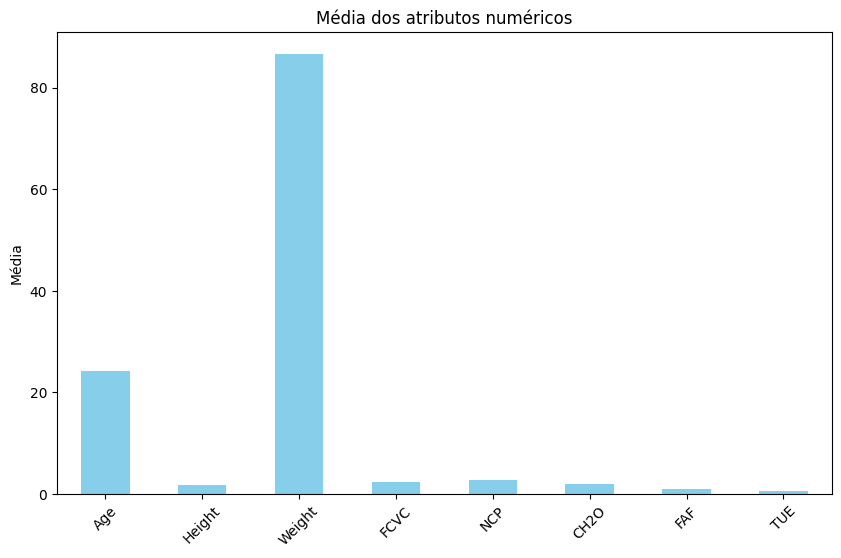

In [16]:
# 6) Exibição da Média

# Lista dos atributos numéricos
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Calcula a média de cada atributo
means = obesityDataSet[num_cols].mean()

# Gráfico de barras
plt.figure(figsize=(10, 6))
means.plot(kind='bar', color='skyblue')
plt.title('Média dos atributos numéricos')
plt.ylabel('Média')
plt.xticks(rotation=45)
plt.show()

#### **Desvio Padrão**

Também vamos utilizar usar um gráfico de barras para o desvio-padrão. Assim podemos comparar a variabilidade de cada atributo.

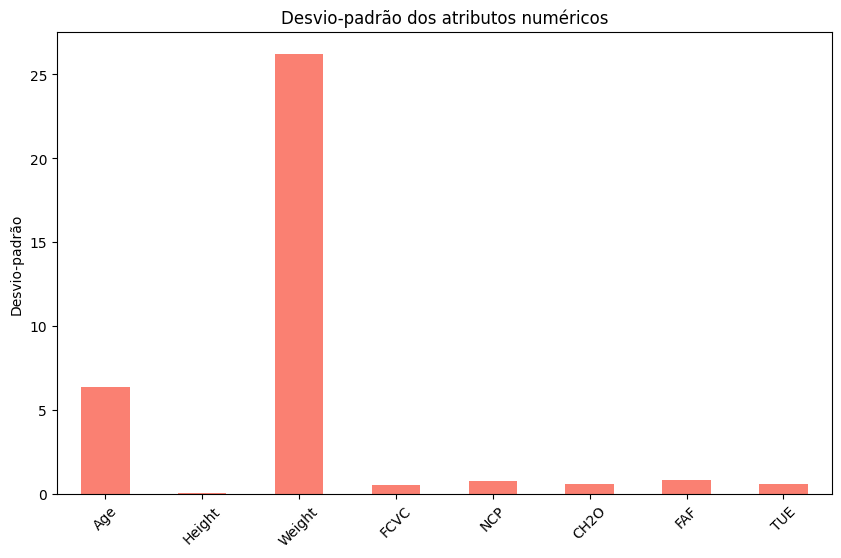

In [17]:
# 7) Exibição do desvio Padrão

# Lista dos atributos numéricos
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Calcula o desvio-padrão de cada atributo
stds = obesityDataSet[num_cols].std()

# Gráfico de barras
plt.figure(figsize=(10, 6))
stds.plot(kind='bar', color='salmon')
plt.title('Desvio-padrão dos atributos numéricos')
plt.ylabel('Desvio-padrão')
plt.xticks(rotation=45)
plt.show()

### **Histograma**

#### *Age (Idade)*

A maioria dos indivíduos está na faixa de 18,7 a 23,4 anos, concentrando mais da metade da amostra nas faixas até os 28 anos. Há uma diminuição gradual para as faixas mais altas, com poucos casos acima dos 50 anos, indicando predominância de jovens adultos no dataset.

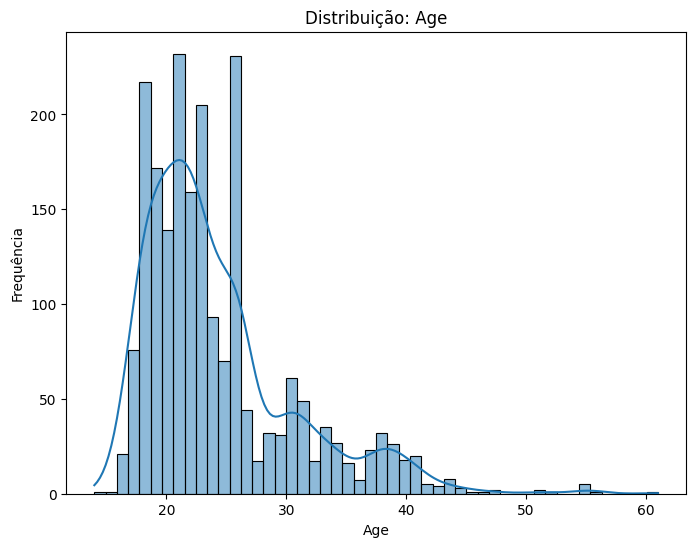

In [19]:
# 8) Histograma de Idade

plt.figure(figsize=(8, 6))
sns.histplot(obesityDataSet['Age'], kde=True)
plt.title('Distribuição: Age')
plt.xlabel('Age')
plt.ylabel('Frequência')
plt.show()

#### *Height (Altura)*

A altura está relativamente bem distribuída, com concentração maior entre 1,6 e 1,8 metros, refletindo uma população com altura padrão. Há poucos indivíduos muito baixos (<1,5 m) ou muito altos (>1,9 m), mostrando pouca dispersão extrema.

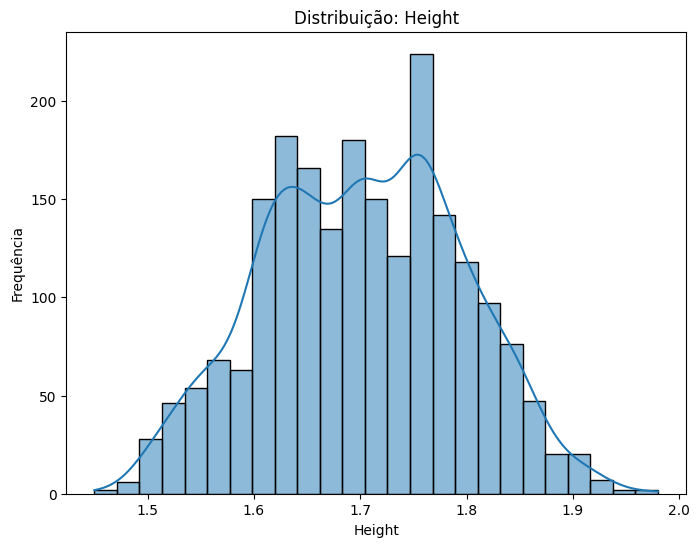

In [20]:
# 9) Histograma da Altura

plt.figure(figsize=(8, 6))
sns.histplot(obesityDataSet['Height'], kde=True)
plt.title('Distribuição: Height')
plt.xlabel('Height')
plt.ylabel('Frequência')
plt.show()

#### *Weight (Peso)*

O peso apresenta uma distribuição ampla e gradual. Nota-se uma presença significativa de indivíduos com peso alto (mais de 100 kg), o que pode indicar casos de obesidade severa ou possíveis outliers que merecem atenção.

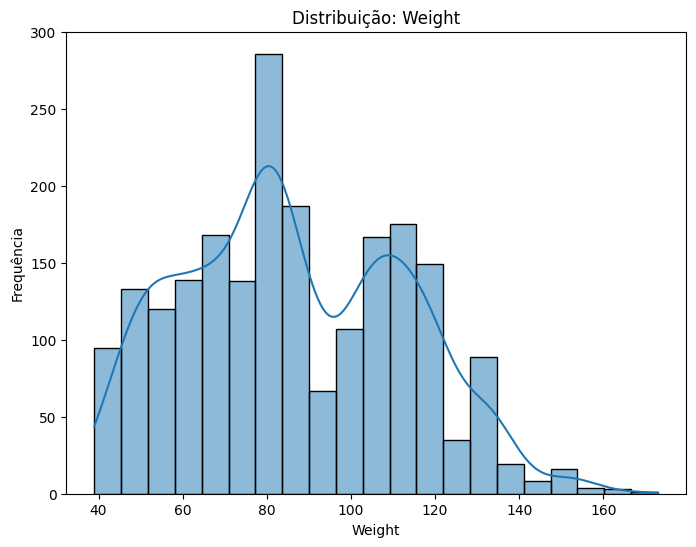

In [22]:
# 10) Histograma do Peso

plt.figure(figsize=(8, 6))
sns.histplot(obesityDataSet['Weight'], kde=True)
plt.title('Distribuição: Weight')
plt.xlabel('Weight')
plt.ylabel('Frequência')
plt.show()

#### *FCVC (Frequência de consumo de vegetais)*

Após a analise do grafico temos duas concentrações: um pico grande em torno de 2 e outro maior ainda próximo de 3, sugerindo que a maioria dos indivíduos consome vegetais regularmente. Contudo, existem registros baixos (faixas 1 a 1,8) que indicam consumo pouco frequente.

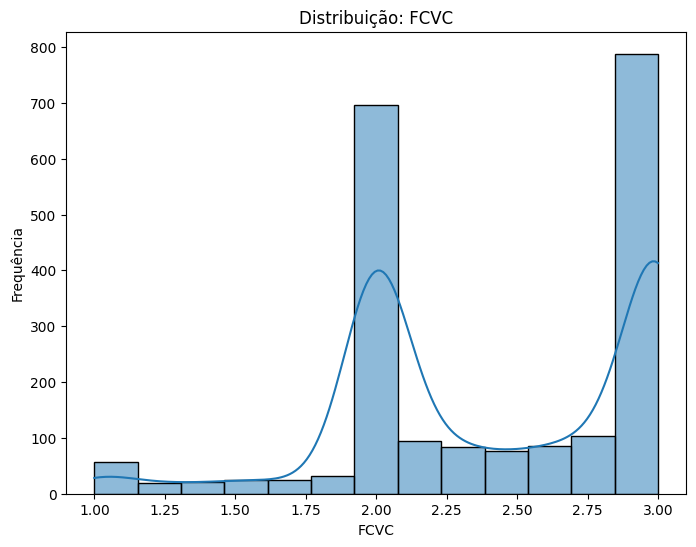

In [23]:
# 11) Histograma da Frequência de Consumo de Vegetais

plt.figure(figsize=(8, 6))
sns.histplot(obesityDataSet['FCVC'], kde=True)
plt.title('Distribuição: FCVC')
plt.xlabel('FCVC')
plt.ylabel('Frequência')
plt.show()

#### *NCP (Número de refeições principais)*

Predomina uma grande concentração na faixa entre 2,8 e 3,1 refeições por dia, indicando que a maioria faz cerca de 3 refeições diárias. As outras faixas apresentam contagens menores e mais distribuídas.

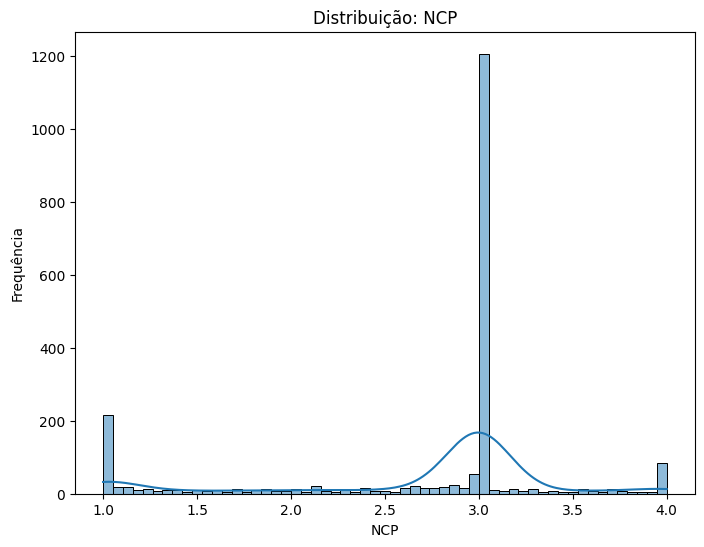

In [24]:
# 12) Histograma do Número de Refeições Principais Diárias

plt.figure(figsize=(8, 6))
sns.histplot(obesityDataSet['NCP'], kde=True)
plt.title('Distribuição: NCP')
plt.xlabel('NCP')
plt.ylabel('Frequência')
plt.show()

#### *CH2O (Consumo diário de água)*

O consumo de água apresenta concentração considerável entre 1,8 e 3 litros, com o pico em 2 litros, mas há também uma parcela significativa consumindo entre 1 e 1,2 litros, o que pode apontar para hábitos variados ou necessidade de padronização.

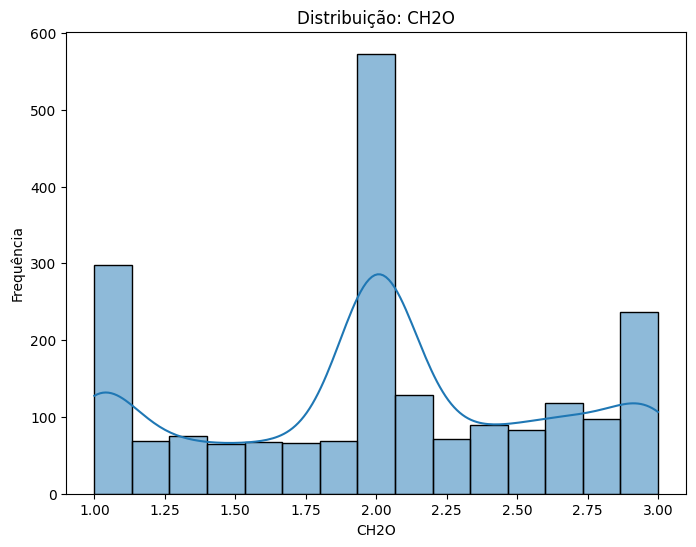

In [25]:
# 13) Histograma do Consumo Diário de Água

plt.figure(figsize=(8, 6))
sns.histplot(obesityDataSet['CH2O'], kde=True)
plt.title('Distribuição: CH2O')
plt.xlabel('CH2O')
plt.ylabel('Frequência')
plt.show()

#### *FAF (Frequência de atividade física)*

Há uma concentração forte em zero, indicando muitos indivíduos sem atividade física. Outro pico relevante ocorre entre 0,5 e 1,0, com uma distribuição mais espalhada nas outras faixas, o que indica variabilidade significativa na frequência de atividade.

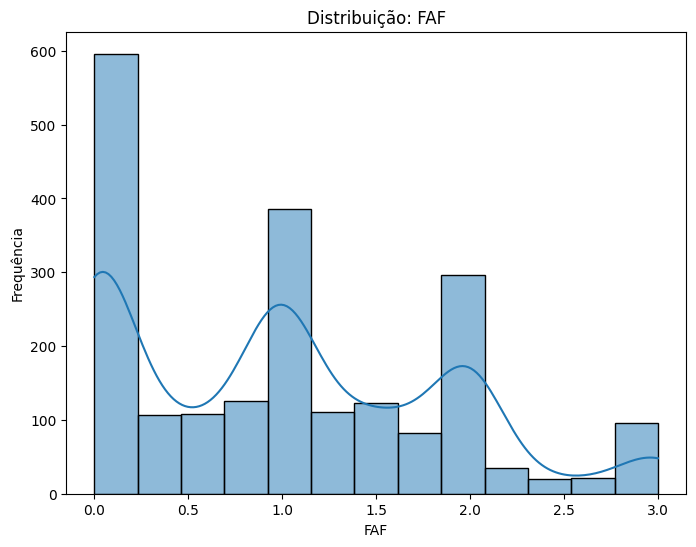

In [26]:
# 14) Histograma da Frequência de Atividade Física

plt.figure(figsize=(8, 6))
sns.histplot(obesityDataSet['FAF'], kde=True)
plt.title('Distribuição: FAF')
plt.xlabel('FAF')
plt.ylabel('Frequência')
plt.show()

#### *TUE (Tempo de uso de dispositivos tecnológicos)*

A maior concentração está na faixa entre 0 e 0,2 horas diárias, o que é surpreendentemente baixo e pode sugerir algum problema na escala ou no registro dessa variável. As outras faixas são relativamente uniformes, com presença de usuários com tempo maior de uso.

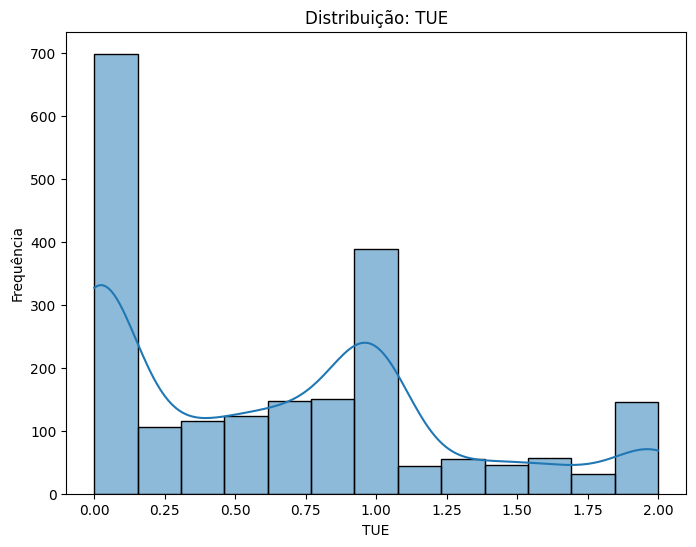

In [27]:
# 15) Histograma do Tempo de Uso de Dispositivos Tecnológicos

plt.figure(figsize=(8, 6))
sns.histplot(obesityDataSet['TUE'], kde=True)
plt.title('Distribuição: TUE')
plt.xlabel('TUE')
plt.ylabel('Frequência')
plt.show()

### **Boxplot**

Para investigar como os atributos numéricos se comportam entre os diferentes níveis de obesidade, foram gerados boxplots para cada variável, agrupados pela variável-alvo NObeyesdad. Essa abordagem permitiu visualizar, de forma clara, as diferenças de mediana, dispersão, limites mínimo e máximo e a presença de possíveis outliers.

In [28]:
# 16) Estatísticas descritivas agrupadas por nivel de obesidade

# Define a ordem correta
ordered_classes = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# Define a variável como categórica com ordem específica
obesityDataSet['NObeyesdad'] = pd.Categorical(
    obesityDataSet['NObeyesdad'],
    categories=ordered_classes,
    ordered=True
)

num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in num_cols:
    print(f"\n=== {col} ===")
    print(
        obesityDataSet.groupby('NObeyesdad', observed=True)[col]
        .describe()[['mean', '50%', 'std', 'min', 'max']]
        .rename(columns={'50%': 'median'})
    )


=== Age ===
                          mean     median       std        min   max
NObeyesdad                                                          
Insufficient_Weight  19.783237  19.244594  2.669511  16.000000  39.0
Normal_Weight        21.734266  21.000000  5.105142  14.000000  61.0
Overweight_Level_I   23.443340  21.052894  6.120058  16.093234  55.0
Overweight_Level_II  26.996981  24.000000  8.061061  17.000000  56.0
Obesity_Type_I       25.898380  22.969366  7.775803  15.000000  52.0
Obesity_Type_II      28.248089  27.226580  4.870188  20.000000  41.0
Obesity_Type_III     23.495554  25.369387  2.764324  18.000000  26.0

=== Height ===
                         mean    median       std       min   max
NObeyesdad                                                       
Insufficient_Weight  1.691117  1.704180  0.099687  1.520000  1.90
Normal_Weight        1.676853  1.660000  0.094583  1.500000  1.93
Overweight_Level_I   1.688106  1.693080  0.096056  1.450000  1.90
Overweight_Level_II 

#### *Age (Idade)* por nível de obesidade

Nos boxplots de Age, observam-se que as medianas de idade tendem a crescer dos indivíduos com peso insuficiente (Insufficient_Weight) até Obesity_Type_II. Um detalhe interessante é que Obesity_Type_I apresenta uma mediana um pouco mais baixa do que Obesity_Type_III. Isso indica que indivíduos classificados como Obesity_Type_I podem incluir uma faixa etária mais jovem do que o esperado na progressão do sobrepeso. Essa variação reforça que a relação entre idade e obesidade não é linear, embora a tendência geral de aumento seja clara.

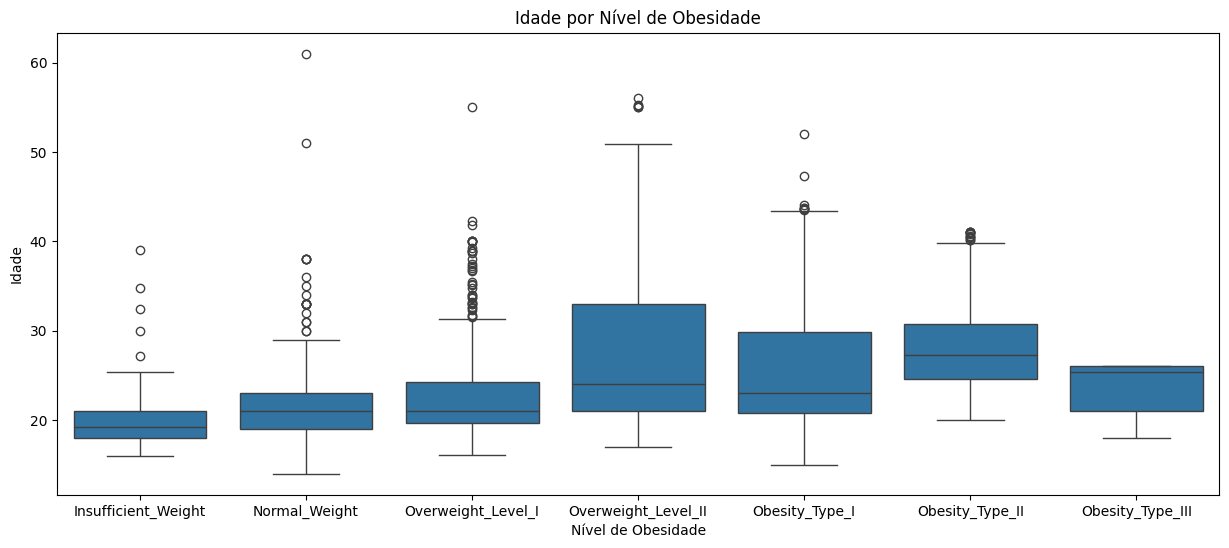

In [29]:
# 17) Boxplot da Idade (Age) por nível de obesidade

ordered_classes = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

plt.figure(figsize=(15, 6))
sns.boxplot(
    x='NObeyesdad',
    y='Age',
    data=obesityDataSet,
    order=ordered_classes
)
plt.title('Idade por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Idade')
plt.show()

#### *Height (Altura)* por nível de obesidade

Os boxplots de Height mostram que a altura possui pouca variação significativa entre as classes. As caixas interquartílicas se sobrepõem bastante e as medianas são próximas, indicando que a altura não é um fator determinante isolado para diferenciar os grupos de obesidade.

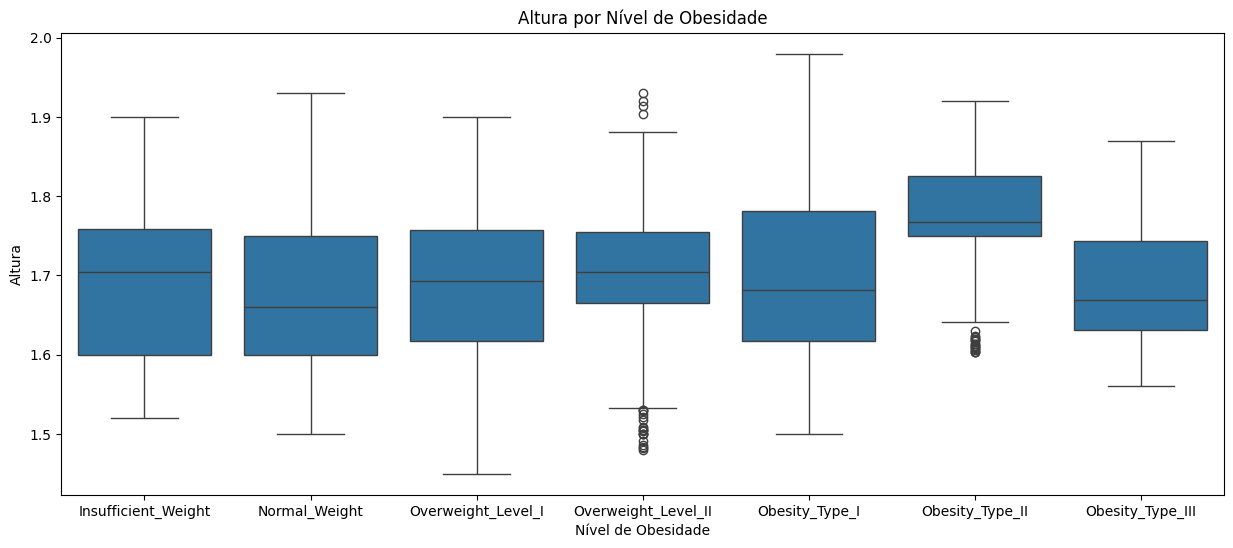

In [31]:
# 18) Boxplot de Altura (Height) por nível de obesidade

ordered_classes = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

plt.figure(figsize=(15, 6))
sns.boxplot(
    x='NObeyesdad',
    y='Height',
    data=obesityDataSet,
    order=ordered_classes
)
plt.title('Altura por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Altura')
plt.show()

#### *Weight (Peso)* por nível de obesidade

Os boxplots de Weight revelam um aumento geral das medianas do peso conforme os níveis de obesidade avançam, do Insufficient_Weight ao Obesity_Type_II. No entanto, um detalhe importante é que, apesar da média ser maior em Obesity_Type_III, a mediana do peso nesta classe é um pouco inferior à do grupo Obesity_Type_II. Isso sugere que Obesity_Type_III apresenta uma distribuição mais dispersa, com valores extremos que elevam a média, mas que também possui um conjunto significativo de indivíduos com peso abaixo da mediana da classe imediatamente anterior. Esse comportamento é evidenciado pelo desvio padrão maior em Obesity_Type_III e pela amplitude maior do boxplot.

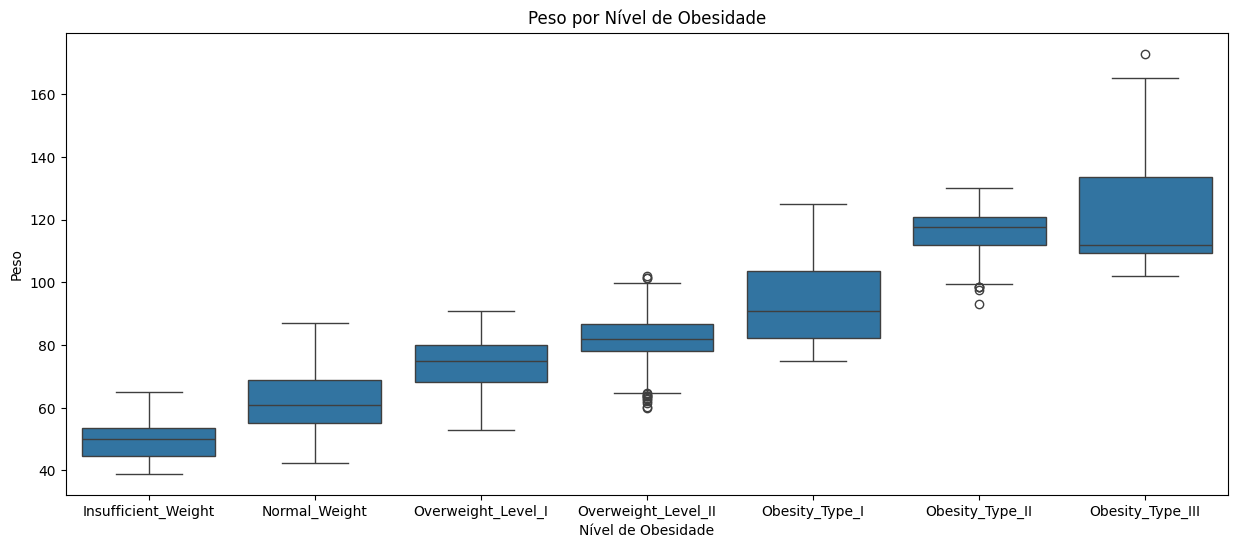

In [33]:
# 19) Boxplot de Peso (Weight) por nível de obesidade

ordered_classes = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

plt.figure(figsize=(15, 6))
sns.boxplot(
    x='NObeyesdad',
    y='Weight',
    data=obesityDataSet,
    order=ordered_classes
)
plt.title('Peso por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Peso')
plt.show()

#### *FCVC (Frequência de Consumo de Vegetais)* por nível de obesidade

Os boxplots de FCVC indicam que indivíduos com peso insuficiente apresentam mediana um pouco maior de consumo de vegetais. No entanto, nota-se um comportamento atípico em Obesity_Type_III: todos os valores estão fixos no máximo da escala, formando uma caixa nula sem variação. Visualmente, isso sugere que parte dos dados pode ter sido gerada sinteticamente com valores repetidos, devendo ser revisada na etapa de pré-processamento.

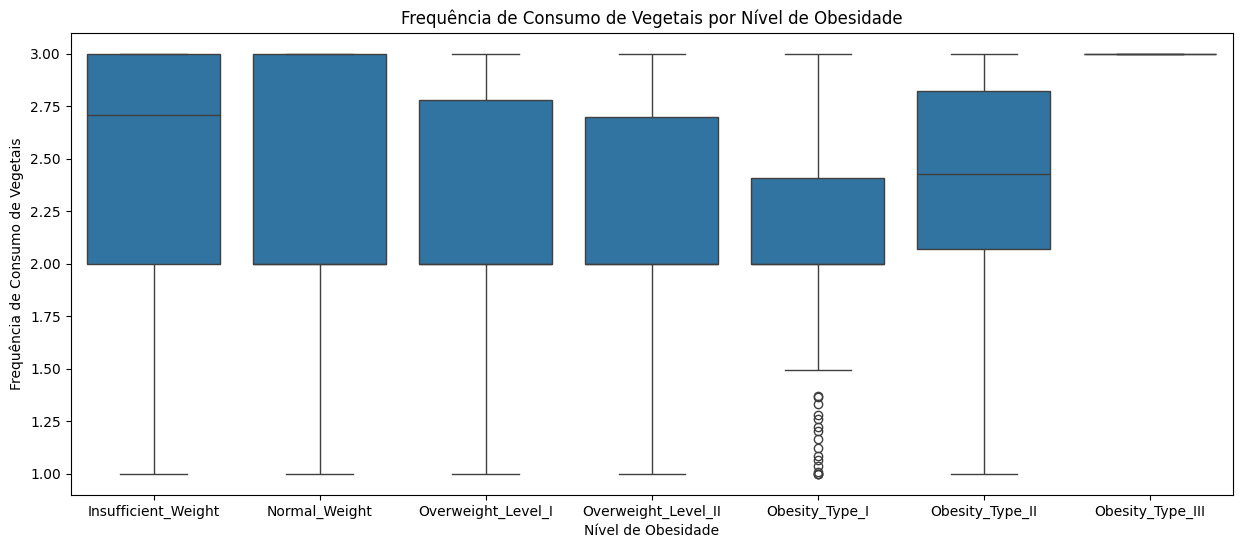

In [34]:
# 20) Boxplot da Frequência de Consumo de Vegetais (FCVC) por nível de obesidade

ordered_classes = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

plt.figure(figsize=(15, 6))
sns.boxplot(
    x='NObeyesdad',
    y='FCVC',
    data=obesityDataSet,
    order=ordered_classes
)
plt.title('Frequência de Consumo de Vegetais por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Frequência de Consumo de Vegetais')
plt.show()

#### *NCP (Número de Refeições Principais)* por nível de obesidade

Os boxplots de NCP indicam que a maioria dos indivíduos, independentemente do nível de obesidade, faz em média 3 refeições principais por dia — o que é confirmado pelas medianas: quase todas ficam em 3,0, com exceção de Overweight_Level_II, que apresenta uma mediana ligeiramente abaixo.
Visualmente, percebe-se que os grupos Obesity_Type_III e Normal_Weight apresentam valores praticamente fixos em 3,0, formando uma linha única sem caixa aparente — o que indica ausência de dispersão.
Esse padrão sugere que, para esses grupos, parte dos dados pode ter sido gerada sinteticamente ou que o hábito de três refeições diárias é muito homogêneo nesses registros. Assim, NCP isolado não contribui para diferenciar claramente os níveis de obesidade, mas pode ser útil quando combinado a outros fatores, como lanches entre refeições (CAEC).

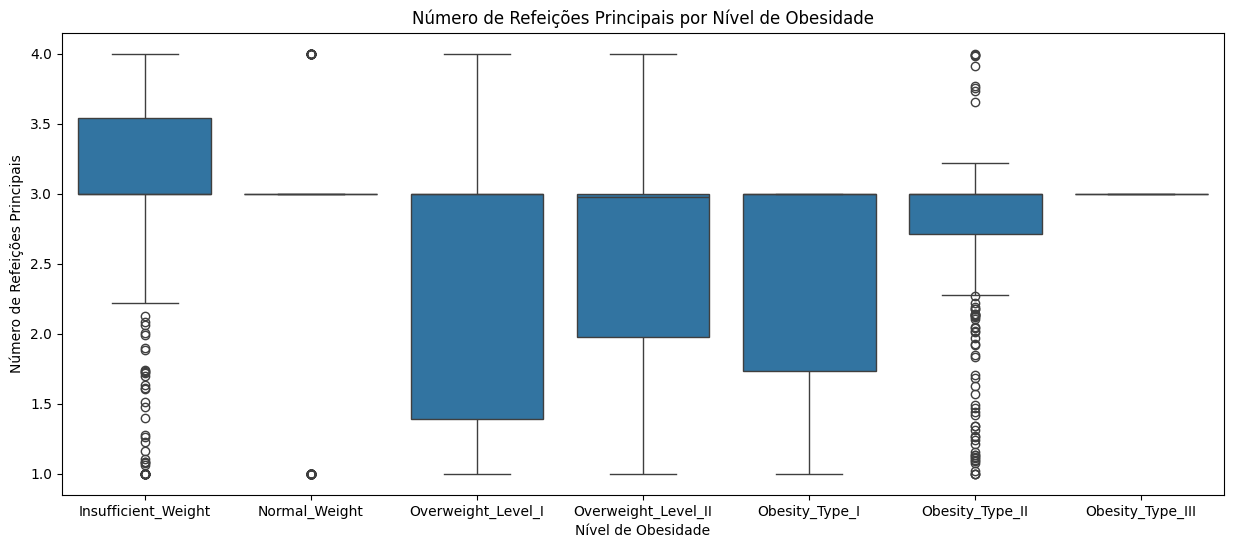

In [35]:
# 21) Boxplot do Número de Refeições Principais (NCP) por nível de obesidade

ordered_classes = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

plt.figure(figsize=(15, 6))
sns.boxplot(
    x='NObeyesdad',
    y='NCP',
    data=obesityDataSet,
    order=ordered_classes
)
plt.title('Número de Refeições Principais por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Número de Refeições Principais')
plt.show()

#### *CH2O (Consumo de Água)* por nível de obesidade

O boxplot de CH2O mostra medianas relativamente próximas entre as classes. Há uma leve tendência de consumo de água mais elevado em níveis mais altos de obesidade, mas as diferenças visuais são pequenas, o que indica que esse atributo sozinho não possui grande poder de separação entre os grupos.

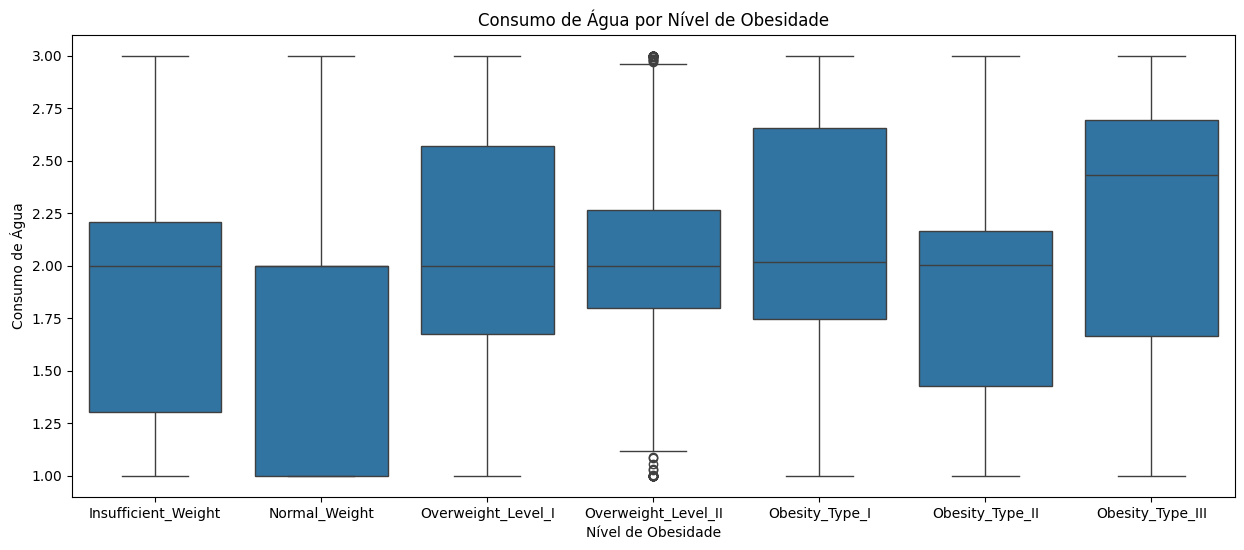

In [36]:
# 22) Boxplot do Consumo de Água (CH2O) por nível de obesidade

ordered_classes = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

plt.figure(figsize=(15, 6))
sns.boxplot(
    x='NObeyesdad',
    y='CH2O',
    data=obesityDataSet,
    order=ordered_classes
)
plt.title('Consumo de Água por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Consumo de Água')
plt.show()

#### *FAF (Atividade Física)* por nível de obesidade

O boxplot de FAF mostra uma tendência clara: à medida que o nível de obesidade aumenta, a mediana da frequência de atividade física diminui gradualmente. Indivíduos com peso insuficiente têm a maior mediana e média, seguidos de perto pelos de peso normal.
Dos grupos Overweight_Level_I até Obesity_Type_II observa-se uma redução lenta da atividade física, mas é em Obesity_Type_III que ocorre uma queda mais acentuada, com mediana muito mais baixa e média de apenas.
Esse padrão reforça visualmente a relação inversa entre nível de atividade física e nível de obesidade, além de mostrar que, nos casos mais severos, a prática de exercícios é ainda mais limitada.

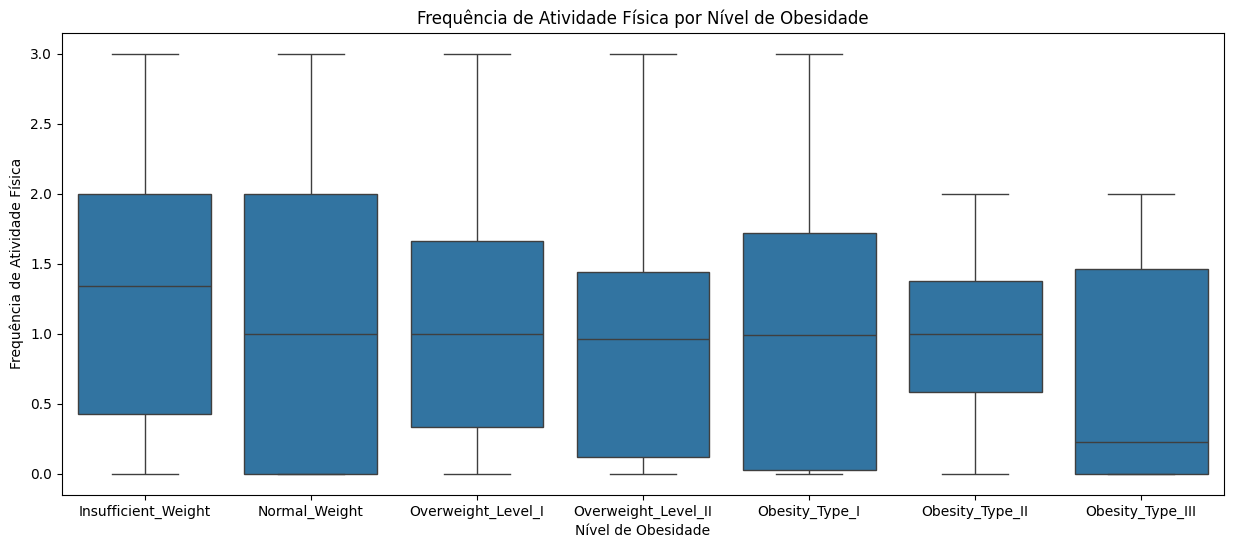

In [37]:
# 23) Boxplot da Frequência de Atividade Física (FAF) por nível de obesidade

ordered_classes = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

plt.figure(figsize=(15, 6))
sns.boxplot(
    x='NObeyesdad',
    y='FAF',
    data=obesityDataSet,
    order=ordered_classes
)
plt.title('Frequência de Atividade Física por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Frequência de Atividade Física')
plt.show()

#### *TUE (Tempo de Uso de Dispositivos Tecnológicos)* por nível de obesidade

Os boxplots de TUE apresentam dispersão ampla em todas as classes, mas sem uma diferença visual marcante entre as medianas. Nota-se que Insufficient_Weight tem, em média, um tempo de tela um pouco maior, mas o atributo não mostra um padrão consistente que permita separar visualmente os grupos de obesidade com clareza. Ainda assim, pode ser útil se combinado a FAF (Frequência de Atividade Física) para indicar grau de sedentarismo.

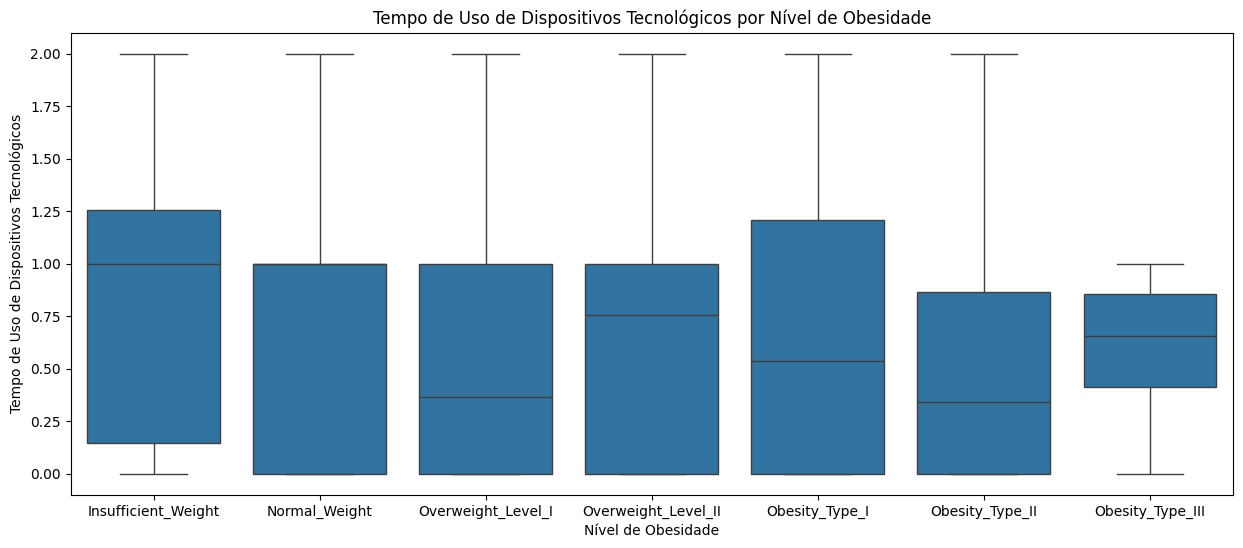

In [38]:
# 24) Boxplot da Tempo de Uso de Dispositivos Tecnológicos (TUE) por nível de obesidade

ordered_classes = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

plt.figure(figsize=(15, 6))
sns.boxplot(
    x='NObeyesdad',
    y='TUE',
    data=obesityDataSet,
    order=ordered_classes
)
plt.title('Tempo de Uso de Dispositivos Tecnológicos por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Tempo de Uso de Dispositivos Tecnológicos')
plt.show()

#### **Observação sobre Outliers**
A análise dos boxplots evidencia outliers visíveis em atributos como Weight, Height, Age, NCP, CH2O e FCVC. Esses valores atípicos podem refletir casos reais de variação extrema ou serem resultado da geração sintética de dados. Por outro lado, FAF e TUE não apresentam outliers, exibindo distribuições mais concentradas.

### **Matriz de Correlação**

In [40]:
# 25) Exibição da Matriz de correlação

# Lista de colunas numéricas
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Calcula a matriz de correlação entre essas colunas
corr_matrix = obesityDataSet[num_cols].corr()

# Exibe a tabela no console
print("\nMatriz de Correlação entre atributos numéricos:")
print(corr_matrix)


Matriz de Correlação entre atributos numéricos:
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.026763  0.202160  0.014538 -0.045282 -0.045398 -0.145961   
Height -0.026763  1.000000  0.462977 -0.039332  0.243347  0.212702  0.294542   
Weight  0.202160  0.462977  1.000000  0.215129  0.108548  0.201052 -0.051073   
FCVC    0.014538 -0.039332  0.215129  1.000000  0.041756  0.070034  0.019248   
NCP    -0.045282  0.243347  0.108548  0.041756  1.000000  0.055363  0.126843   
CH2O   -0.045398  0.212702  0.201052  0.070034  0.055363  1.000000  0.166481   
FAF    -0.145961  0.294542 -0.051073  0.019248  0.126843  0.166481  1.000000   
TUE    -0.298106  0.052894 -0.072590 -0.103236  0.036888  0.013000  0.059208   

             TUE  
Age    -0.298106  
Height  0.052894  
Weight -0.072590  
FCVC   -0.103236  
NCP     0.036888  
CH2O    0.013000  
FAF     0.059208  
TUE     1.000000  


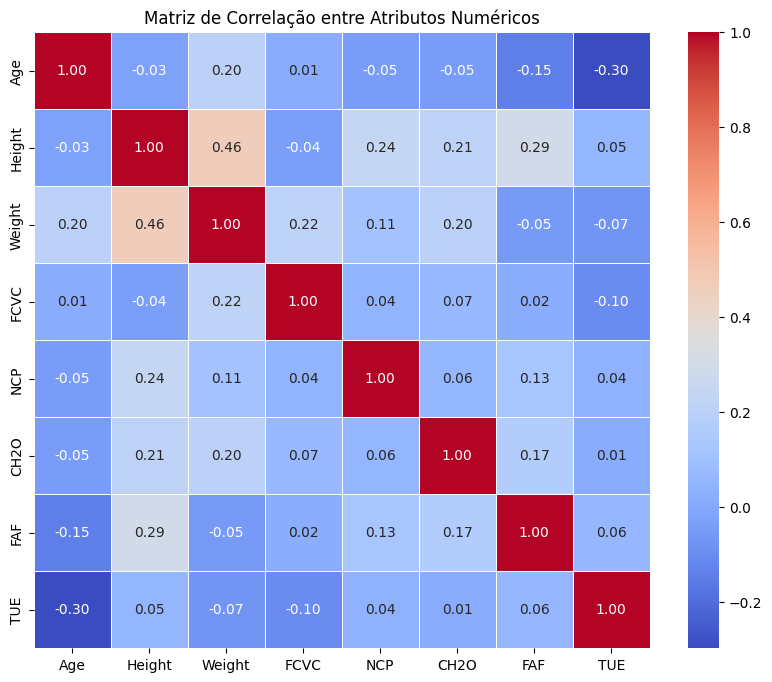

In [41]:
# 26) Exibição do Heatmap da Matriz de correlação

# Lista de colunas numéricas
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Calcula a matriz de correlação
corr_matrix = obesityDataSet[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=.5
)
plt.title('Matriz de Correlação entre Atributos Numéricos')
plt.show()

#### **Análise da Matriz de Correlação entre Atributos Numéricos**

A partir da análise da matriz de correlação e do heatmap, destacam-se os seguintes pontos principais:

*   Altura (Height) e Peso (Weight) apresentam uma correlação positiva moderada de aproximadamente 0,46, evidenciada no heatmap por um tom avermelhado mais intenso. Isso indica que indivíduos mais altos tendem a pesar mais, o que está alinhado com as expectativas biológicas.
*   Idade (Age) mostra correlação positiva fraca com Peso (0,20), sugerindo que o peso tende a aumentar levemente com a idade dentro do intervalo da amostra.
*   Peso (Weight) também apresenta correlações positivas baixas com o consumo de vegetais (FCVC, 0,21) e com o consumo de água (CH2O, 0,20), indicando que indivíduos com maior peso podem ter um leve aumento nesses hábitos, embora a relação seja fraca.
*   A frequência de atividade física (FAF) tem correlação positiva moderada com Altura (0,29) e correlações negativas fracas com Idade (-0,15) e Peso (-0,05), sugerindo que pessoas mais altas praticam mais atividade física, enquanto a prática diminui um pouco com a idade e o peso.
*   O tempo de uso de dispositivos tecnológicos (TUE) apresenta correlação negativa moderada com Idade (-0,30), indicada pela coloração azulada no heatmap, o que sugere que indivíduos mais jovens tendem a passar mais tempo usando dispositivos. Também há correlações negativas fracas com Peso (-0,07) e consumo de vegetais (FCVC, -0,10).
*   Outros pares de atributos apresentam correlações próximas a zero, indicando pouca relação linear direta entre eles.
*   A maior parte das outras células apresenta cores claras no heatmap, evidenciando correlações baixas entre os demais pares de atributos, o que sugere independência relativa entre eles.

A matriz indica que não há multicolinearidade forte entre os atributos numéricos, o que é positivo para a modelagem preditiva. Algumas correlações fazem sentido no contexto, como a associação positiva entre altura e peso e a relação negativa entre idade e tempo de uso de dispositivos.

## Pré-Processamento de Dados

#### **Remoção de duplicatas**

A remoção de duplicatas é uma etapa essencial no pré-processamento para evitar que registros repetidos distorçam estatísticas, influenciem indevidamente o treinamento do modelo ou causem overfitting. Mesmo em datasets gerados parcialmente de forma sintética, como neste caso, é importante garantir que não haja linhas idênticas que representem o mesmo indivíduo ou o mesmo perfil de hábitos de forma redundante.

In [42]:
# 27) Checar e remover duplicatas

# Verificar quantas linhas duplicadas existem
num_duplicates = obesityDataSet.duplicated().sum()
print(f"Número de linhas duplicadas encontradas: {num_duplicates}")

# Remover duplicatas, mantendo apenas a primeira ocorrência
obesityDataSet_cleaned = obesityDataSet.drop_duplicates()

# Conferir o novo shape
print(f"Shape do dataset após remoção: {obesityDataSet_cleaned.shape}")

Número de linhas duplicadas encontradas: 24
Shape do dataset após remoção: (2082, 17)


Após verificação para identificar registros duplicados no conjunto de dados. Foram encontradas 24 linhas duplicadas, que representavam aproximadamente 1,1% do total. Essas duplicatas foram removidas para evitar distorções nas análises estatísticas e no treinamento do modelo, garantindo que cada registro represente uma amostra única.
Após a remoção, o dataset passou a conter 2082 registros e 17 atributos, tornando-se mais consistente e adequado para as próximas etapas de seleção de atributos e modelagem preditiva.

#### **Divisão inicial do dataset (Holdout e Validação Cruzada)**

Utilizando o conceito de holdout, o dataset foi dividido em 80% para treinamento e 20% para teste, garantindo que o modelo seja avaliado em dados não vistos.

Além disso, foi aplicada a validação cruzada estratificada com 10 partições, o que fornece uma avaliação mais robusta e confiável do desempenho do modelo. Essa técnica reduz a dependência da aleatoriedade de uma única divisão treino/teste, proporcionando uma média de desempenho em diferentes subconjuntos dos dados.

A estratificação foi utilizada para manter a proporção das classes em cada partição, garantindo que todos os níveis de obesidade estejam representados de forma equilibrada tanto no treinamento quanto na validação. Isso é fundamental para evitar viés, especialmente em problemas de classificação com classes potencialmente desbalanceadas.

Além de tudo, a validação cruzada auxilia na detecção de overfitting, identificando se o modelo se ajusta excessivamente aos dados de treinamento, o que poderia prejudicar sua capacidade de generalizar para novos casos reais.

In [43]:
# 28) Divisão inicial do dataset limpo (Holdout e Validação Cruzada)

seed = 42 # Semente para reprodutibilidade

testSize = 0.20 # tamanho do conjunto de teste

# Separação em conjuntos de treino e teste
X = obesityDataSet_cleaned.drop(columns=['NObeyesdad'])
y = obesityDataSet_cleaned['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=testSize, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

#### **Codificação de atributos**

Para transformar as variáveis categóricas em formatos numéricos utilizáveis pelos algoritmos de aprendizado de máquina, foram aplicadas diferentes estratégias de codificação, considerando a natureza de cada atributo:

*   **Codificação Ordinal**: atributos com relação de ordem (como frequência de consumo de alimentos entre refeições e de bebidas alcoólicas) foram codificados com mapeamentos manuais.
*   **Codificação Nominal (One-Hot Encoding)**: atributos nominais sem hierarquia, como o meio de transporte utilizado (MTRANS), foram codificados por OneHotEncoder para gerar colunas binárias.
*   **Codificação Binária**: atributos com respostas yes/no foram codificados por LabelEncoder para garantir valores 0 ou 1.
*   **Variável alvo**: os níveis de obesidade foram mapeados explicitamente para valores de 0 a 6, mantendo a ordem crescente de severidade.

Além disso, o preprocessor foi ajustado apenas com os dados de treinamento e depois aplicado aos dados de teste, evitando vazamento de informação.

In [44]:
# 29) Codificação de atributos

np.random.seed(42)

# Codificação personalizada (usando funções auxiliares)
def encode_ordinal(data, columns, mapping_dicts):
    for col, mapping in zip(columns, mapping_dicts):
        data[col] = data[col].map(mapping)
    return data

# Mapeamento explícito para variáveis categóricas
ordinal_mappings = [
    {'Female': 0, 'Male': 1}, # Gender
    {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},  # CAEC
    {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}  # CALC
]

# Definir colunas categóricas
ordinal_cols = ['Gender', 'CAEC', 'CALC']
nominal_cols = ['MTRANS']
categorical_simple_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Criar transformações
ordinal_transformer = FunctionTransformer(
    encode_ordinal, kw_args={'columns': ordinal_cols, 'mapping_dicts': ordinal_mappings}
)

nominal_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Para as variáveis categóricas simples (LabelEncoder em cada coluna)
simple_transformer = FunctionTransformer(lambda df: df.apply(lambda col: LabelEncoder().fit_transform(col)))

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('nominal', nominal_transformer, nominal_cols),
        ('simple', simple_transformer, categorical_simple_cols)
    ],
    remainder='passthrough' # Manter outras colunas inalteradas
)

# Fit no treino
preprocessor.fit(X_train)

# Transformar treino e teste
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Codificação da variável target
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Codificar a variável target
y_train_encoded = y_train.map(target_mapping)
y_test_encoded = y_test.map(target_mapping)


# Reconstruir nomes das colunas transformadas
# Nomes do OneHotEncoder
onehot_encoder = preprocessor.named_transformers_['nominal']
onehot_feature_names = onehot_encoder.get_feature_names_out(nominal_cols)

# Ordinais e Simples mantêm nomes
ordinal_feature_names = ordinal_cols
simple_feature_names = categorical_simple_cols

# Pegar as colunas que passaram direto
passthrough_cols = [col for col in X_train.columns if col not in ordinal_cols + nominal_cols + categorical_simple_cols]

# Juntar tudo na ordem exata do preprocessor
final_feature_names = list(ordinal_feature_names) + list(onehot_feature_names) + list(simple_feature_names) + passthrough_cols

print("\nNomes finais das features transformadas:")
print(final_feature_names)

# Converter X_train_encoded para DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=final_feature_names)



Nomes finais das features transformadas:
['Gender', 'CAEC', 'CALC', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


#### **Normalização**

A normalização é uma técnica de pré-processamento que transforma os dados numéricos para uma escala comum, geralmente entre 0 e 1. Isso facilita a comparação entre variáveis que originalmente possuem unidades e escalas diferentes. O objetivo principal da normalização é evitar que atributos com valores maiores dominem a análise ou o treinamento dos modelos, especialmente em algoritmos que são sensíveis à magnitude dos dados, como K-Nearest Neighbors (KNN) e Redes Neurais.

Vamos utilizar para a normalização, o **MinMaxScaler()**.


Primeiras 5 linhas dos dados normalizados (treino):
        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0  0.152841  0.509434  0.341632  0.500000  0.489474  0.500000  0.666667   
1  0.255319  0.354198  0.593631  1.000000  0.666667  0.854570  0.000000   
2  0.106383  0.830189  0.394609  0.500000  1.000000  0.500000  1.000000   
3  0.332632  0.726117  0.544226  0.902767  0.666667  0.441423  0.666667   
4  0.247941  0.405547  0.591274  1.000000  0.666667  0.302037  0.009909   

        TUE  
0  0.500000  
1  0.055259  
2  0.500000  
3  0.353890  
4  0.100061  


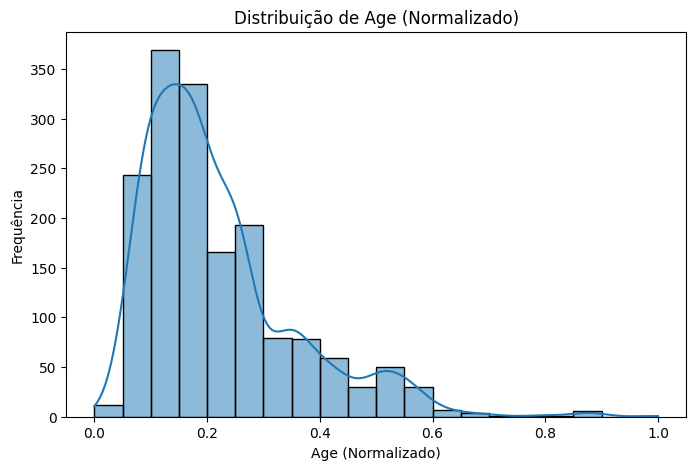

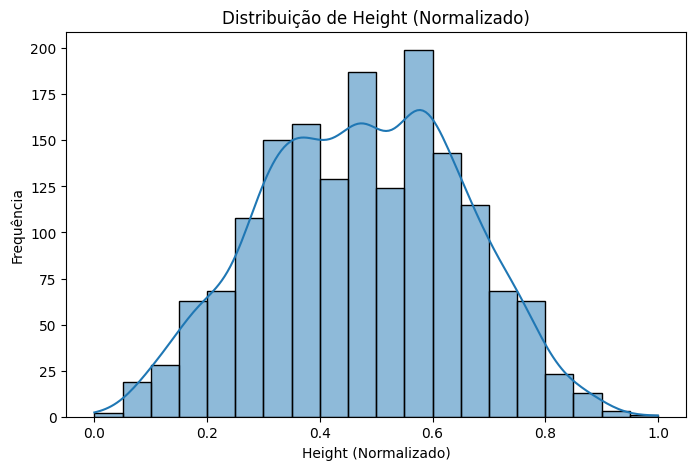

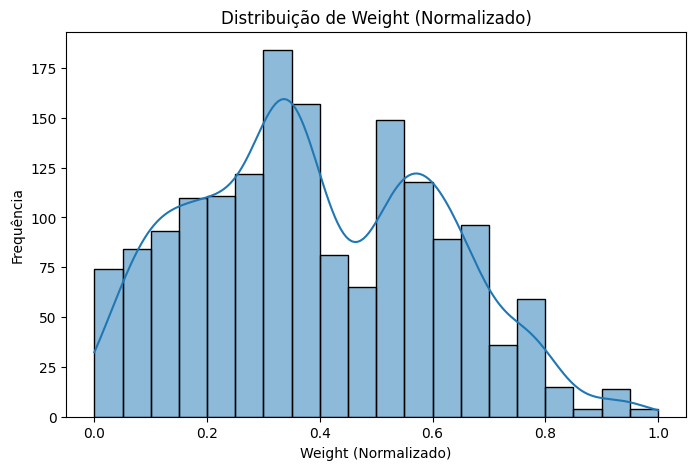

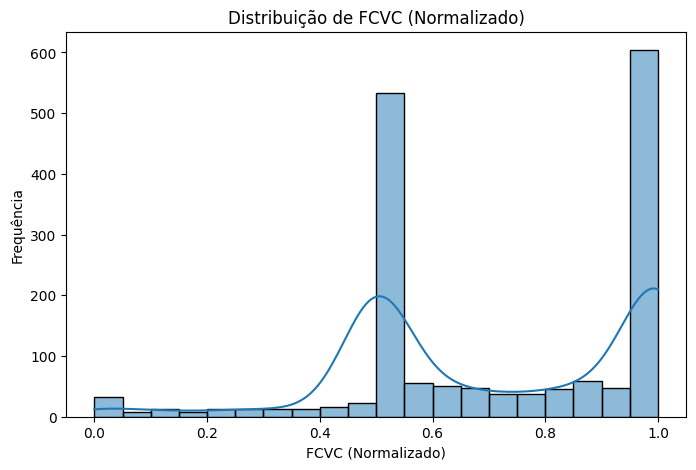

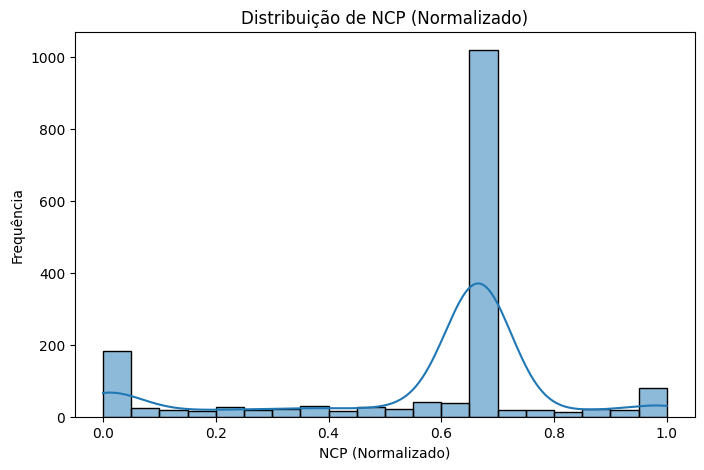

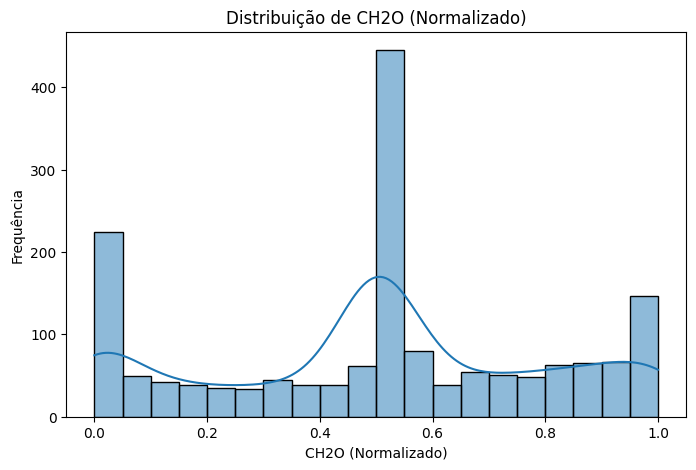

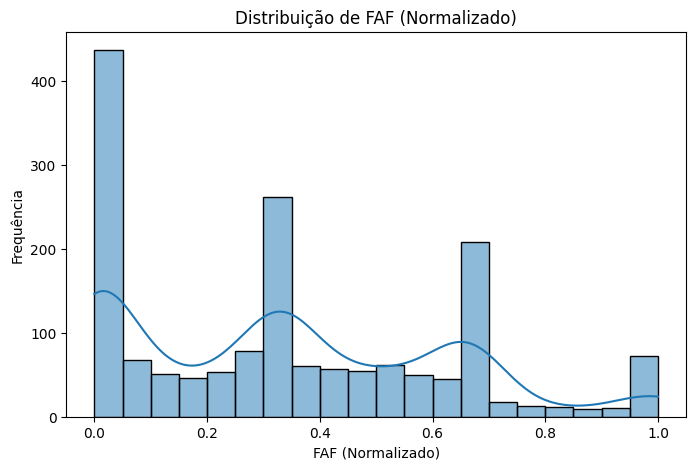

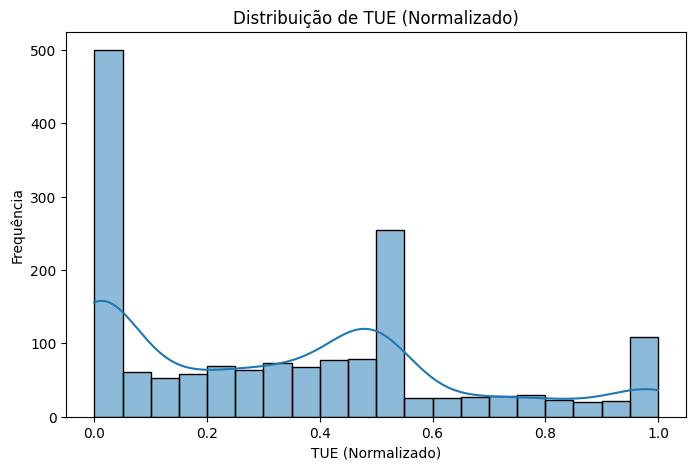

In [45]:
# 30) Normalização dos atributos

# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train[numeric_cols])
X_train_normalized = scaler_norm.transform(X_train[numeric_cols])
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test[numeric_cols])

# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=numeric_cols)

print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())

# Histograma para cada atributo numérico normalizado
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_normalized[col], kde=True, bins=20)
    plt.title(f'Distribuição de {col} (Normalizado)')
    plt.xlabel(f'{col} (Normalizado)')
    plt.ylabel('Frequência')
    plt.show()



Após aplicar a normalização Min-Max, foram gerados histogramas para verificar o comportamento dos atributos numéricos reescalados.

*   A análise mostrou que, embora os valores tenham sido transformados para a faixa [0, 1], os padrões de distribuição originais foram preservados:
*   Os atributos que apresentavam assimetria (como Age, FAF e TUE) mantiveram suas concentrações em faixas específicas.
*   Variáveis originalmente concentradas em intervalos estreitos (NCP, FAF) continuam exibindo picos evidentes.
*   A forma geral (caudas, picos, possíveis outliers) não foi alterada — apenas os valores numéricos passaram a ter escala comparável.

Isso confirma que a normalização não distorce a distribuição, mas apenas padroniza as unidades, preparando os dados para algoritmos que são sensíveis à magnitude dos valores (ex.: KNN, Redes Neurais).

#### **Padronização**

A padronização é uma técnica de pré-processamento que transforma os dados para que tenham média zero e desvio padrão igual a um. Diferente da normalização, que ajusta os dados para um intervalo específico (geralmente 0 a 1), a padronização é especialmente útil quando os dados possuem distribuições variadas e diferentes escalas, facilitando a comparação entre atributos.

Essa transformação é fundamental para muitos algoritmos de aprendizado de máquina que assumem que os dados estão distribuídos em torno de zero e com variância uniforme, como regressão logística, máquinas de vetores de suporte (SVM) e redes neurais. A padronização ajuda a evitar que atributos com escalas maiores dominem o processo de treinamento do modelo, melhorando o desempenho e a convergência dos algoritmos.

Vamos utilizar para a padronização, o **StandardScaler**().


Primeiras 5 linhas dos dados padronizados (treino):
        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.494965  0.193108 -0.242008 -0.820069 -0.311113  0.004638  1.151782   
1  0.257647 -0.687760  0.936274  1.081090  0.385018  1.174122 -1.186392   
2 -0.836161  2.013196  0.005700 -0.820069  1.694570  0.004638  2.320869   
3  0.825446  1.422652  0.705269  0.711378  0.385018 -0.188566  1.151782   
4  0.203462 -0.396386  0.925250  1.081090  0.385018 -0.648304 -1.151638   

        TUE  
0  0.533770  
1 -0.915373  
2  0.533770  
3  0.057686  
4 -0.769390  


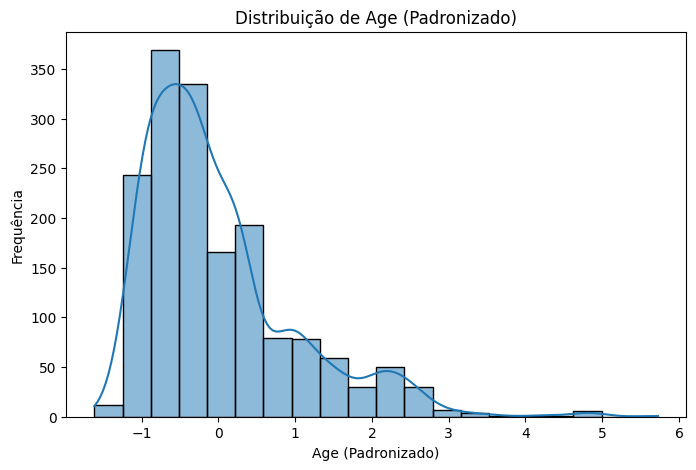

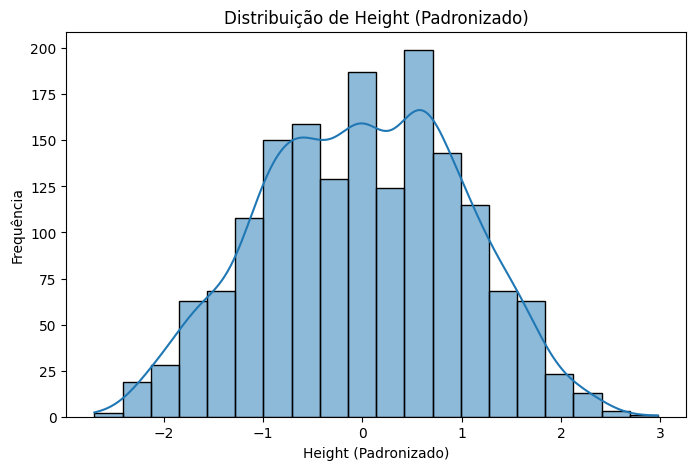

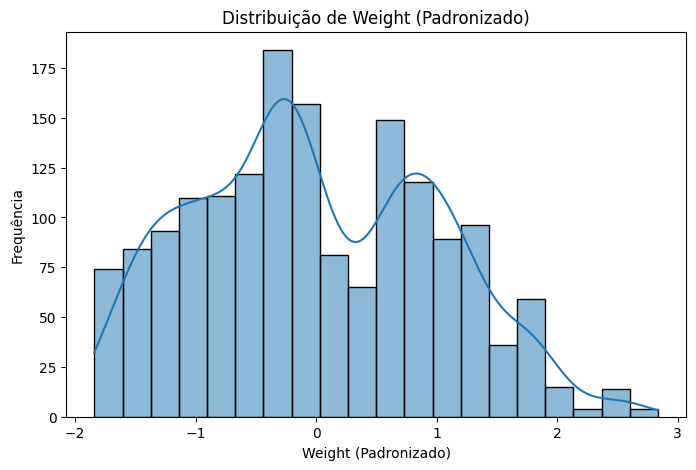

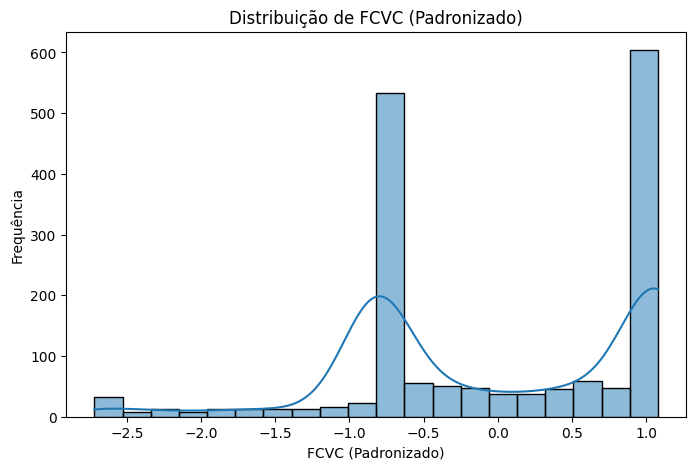

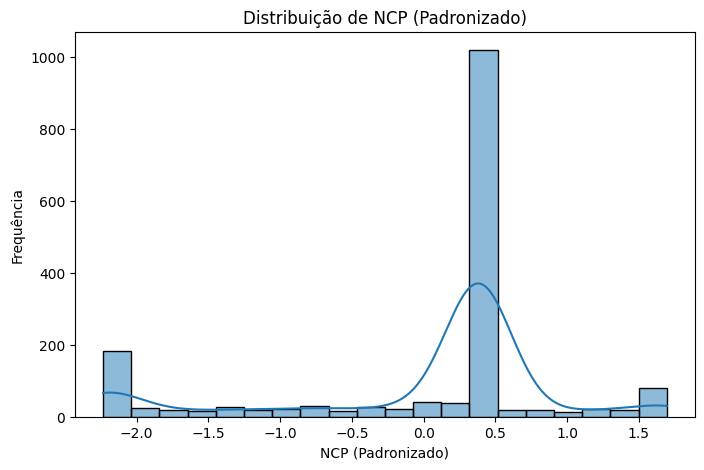

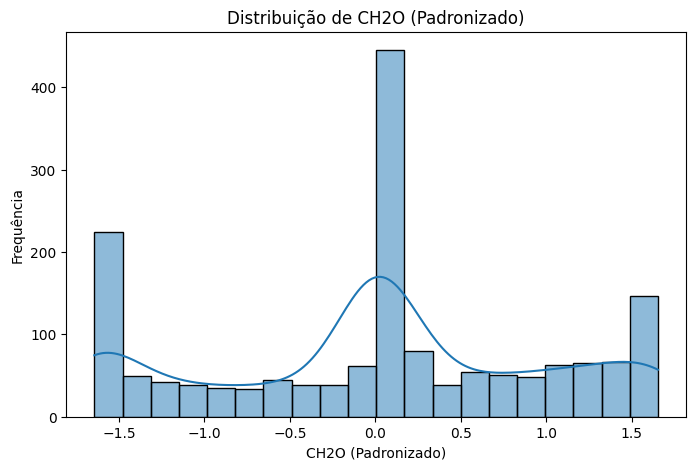

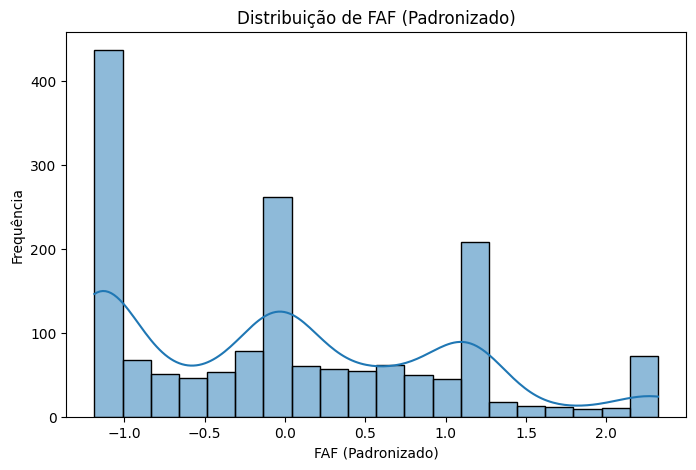

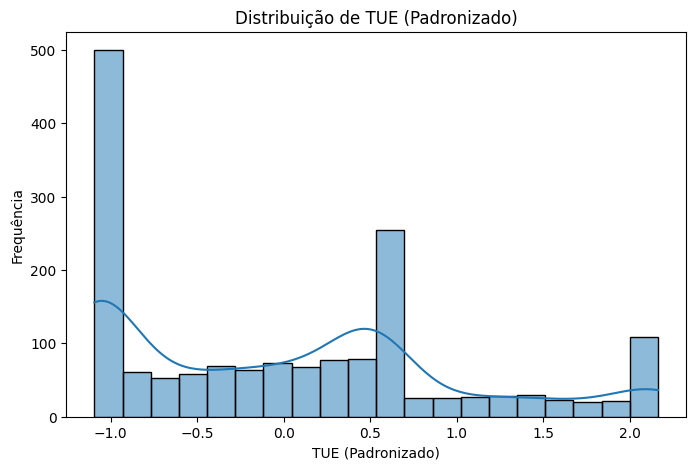

In [46]:
# 31) Padronização dos atributos

# Inicializar o StandardScaler
scaler_std = StandardScaler()

numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train[numeric_cols])

# Padronizar os dados (somente colunas numéricas)
X_train_standardized = scaler_std.transform(X_train[numeric_cols])
X_test_standardized = scaler_std.transform(X_test[numeric_cols])

# Criar DataFrame para visualização
df_standardized = pd.DataFrame(X_train_standardized, columns=numeric_cols)

print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())

# Visualização da distribuição após a padronização para os atributos numéricos
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_standardized[col], kde=True, bins=20)
    plt.title(f'Distribuição de {col} (Padronizado)')
    plt.xlabel(f'{col} (Padronizado)')
    plt.ylabel('Frequência')
    plt.show()

Após aplicar a padronização, a analise dos histogramas dos atributos numéricos mostra que os valores foram transformados para ter média próxima de zero e desvio padrão igual a um, centralizando cada distribuição em torno do eixo zero.

Essa transformação torna os atributos comparáveis em termos de escala, reduz a influência de diferenças de unidades de medida e prepara os dados para algoritmos sensíveis à escala, como redes neurais, SVM e k-NN.

Apesar de cada variável manter o formato da sua distribuição original (assimetria, caudas, picos), todas passam a compartilhar o mesmo centro e amplitude padronizada, facilitando o treinamento do modelo.

#### **Feature Selection**

A etapa de seleção de atributos (feature selection) tem como objetivo identificar quais variáveis de entrada são realmente relevantes para prever o nível de obesidade. Essa etapa contribui para reduzir a dimensionalidade, eliminar atributos irrelevantes ou redundantes, melhorar a interpretabilidade dos resultados e potencialmente aumentar a performance do modelo, evitando overfitting.

Neste MVP, foram avaliadas três abordagens complementares de seleção de atributos:

*   **SelectKBest**: técnica que seleciona as K melhores características com base em uma métrica estatística, como a correlação com a variável alvo. É uma forma direta de ranquear os atributos de acordo com sua relevância individual para a previsão da classe.
*   **Logistic Regression**: em um modelo de regressão logística, cada atributo recebe um coeficiente que representa sua importância para a previsão da variável dependente. Assim, é possível verificar quais variáveis têm maior peso na decisão do modelo.
*   **SelectFromModel com ExtraTreesClassifier**: técnica que usa um modelo supervisionado para calcular a importância de cada variável. O ExtraTreesClassifier, baseado em um conjunto de árvores de decisão, atribui uma pontuação de importância a cada atributo, permitindo selecionar apenas aqueles mais relevantes de forma automática.

Com essas estratégias, o objetivo foi validar a consistência da seleção, comparar resultados entre métodos e escolher o conjunto de variáveis que melhor contribui para a classificação dos níveis de obesidade.

##### **SelectKBest (com ANOVA F-Value)**

In [47]:
# 32) SelectKBest (com ANOVA F-Value)

# Define numero de atributos
k = 10

# Seleção de atributos com SelectKBest
selector_kbest = SelectKBest(score_func=f_classif, k=k)
X_train_kbest = selector_kbest.fit_transform(X_train_encoded_df, y_train_encoded)

selected_mask = selector_kbest.get_support()
selected_features = np.array(X_train_encoded_df.columns)[selected_mask]

print("\nAtributos selecionados pelo SelectKBest:")
print(selected_features)

print("\nScores (F-value) de cada atributo:")
print(selector_kbest.scores_)


Atributos selecionados pelo SelectKBest:
['Gender' 'CAEC' 'CALC' 'MTRANS_Automobile'
 'family_history_with_overweight' 'FAVC' 'Age' 'Height' 'Weight' 'FCVC']

Scores (F-value) de cada atributo:
[ 127.47603559   65.26118032   27.74972683   21.69287428    2.41377286
    4.07227228   21.03418202   11.66825988  121.16932077   39.10708796
    5.13671064   16.37413979   57.65745983   28.27030222 1520.42300089
   87.11051445   20.92998136   12.51944738   15.02459742    5.8534655 ]


A aplicação do SelectKBest com métrica ANOVA F-value permitiu identificar as 10 variáveis mais relevantes para prever o nível de obesidade na base de dados.

Os atributos selecionados incluem características demográficas (Gender e Age), biométricas (Height e Weight), hábitos alimentares e comportamentais (CAEC, CALC, FAVC, FCVC e family_history_with_overweight) e meio de transporte (MTRANS_Automobile).

Entre eles, destacam-se:

*   Peso (Weight) e Gênero (Gender), com os maiores F-values, indicando forte influência na classificação.
*   Variáveis como consumo entre refeições (CAEC), consumo de álcool (CALC) e consumo de vegetais (FCVC) mostram a relevância de fatores relacionados à alimentação.
*   O histórico familiar de sobrepeso reforça o impacto de fatores hereditários.
*   A escolha do automóvel como meio de transporte apareceu como um indicativo indireto de menor atividade física.

Os scores confirmam que hábitos alimentares, estilo de vida e características físicas estão diretamente relacionados ao risco de obesidade, alinhando o resultado com o esperado do contexto da análise.

##### **Coeficientes da Regressão Logística**

In [48]:
# 33) Coeficientes da Regressão Logística (Eliminação Recursiva de Atributos)

# Inicializa o modelo de regressão logística
logreg = LogisticRegression(max_iter=200, solver='liblinear', random_state=42)

# Inicializa o RFE para selecionar 10 atributos
rfe = RFE(estimator=logreg, n_features_to_select=10)

# Ajusta o RFE nos dados de treino
rfe.fit(X_train_encoded, y_train_encoded)

# Máscara de seleção dos atributos
selected_rfe_mask = rfe.support_

# Índices dos atributos selecionados
selected_rfe_indices = rfe.get_support(indices=True)

# Para ver os nomes dos atributos selecionados:
selected_rfe_features = np.array(X_train_encoded_df.columns)[selected_rfe_mask]

print("\nAtributos selecionados pelo RFE:")
print(selected_rfe_features)

print("\nRanking de cada atributo (1 = selecionado, maior = menos importante):")
print(rfe.ranking_)


Atributos selecionados pelo RFE:
['Gender' 'CAEC' 'MTRANS_Automobile' 'MTRANS_Walking'
 'family_history_with_overweight' 'FAVC' 'SMOKE' 'SCC' 'Height' 'FCVC']

Ranking de cada atributo (1 = selecionado, maior = menos importante):
[ 1  1  2  1  4  3  8  1  1  1  1  1 11  1 10  1  7  5  9  6]


O RFE foi aplicado com Logistic Regression como estimador para selecionar 10 atributos mais relevantes na previsão dos níveis de obesidade.
Os atributos escolhidos pelo RFE foram: Gender, CAEC, MTRANS_Automobile, MTRANS_Walking, family_history_with_overweight, FAVC, SMOKE, SCC, Height e FCVC.

Esses atributos receberam ranking igual a 1, indicando maior contribuição na regressão logística para diferenciar os níveis de obesidade no conjunto de dados. Os demais atributos foram ranqueados com valores superiores a 1, indicando menor contribuição para a previsão no contexto desse modelo.

Assim como no SelectKBest, o RFE reforça a relevância de atributos ligados a gênero, hábitos alimentares, histórico familiar, escolhas de transporte e medidas físicas, destacando a coerência entre as diferentes abordagens de seleção de atributos.

##### **SelectFromModel com ExtraTreesClassifier**

In [49]:
# 34) SelectFromModel com ExtraTreesClassifier (Importância de Atributos com ExtraTrees)

# Cria o modelo ExtraTrees
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Treina o modelo nos dados codificados
extra_trees.fit(X_train_encoded, y_train_encoded)

# Usa o SelectFromModel para selecionar os atributos com maior importância
selector_sfm = SelectFromModel(extra_trees, prefit=True)

# Aplica o SelectFromModel ao treino
X_train_sfm = selector_sfm.transform(X_train_encoded)

# Ver atributos selecionados
selected_mask_sfm = selector_sfm.get_support()
selected_features_sfm = X_train_encoded_df.columns[selected_mask_sfm]

print("\nAtributos selecionados pelo SelectFromModel (ExtraTreesClassifier):")
print(selected_features_sfm)

# Visualizar importâncias de todos os atributos
importances = extra_trees.feature_importances_
for name, score in zip(X_train_encoded_df.columns, importances):
    print(f"{name}: {score:.4f}")


Atributos selecionados pelo SelectFromModel (ExtraTreesClassifier):
Index(['Gender', 'CALC', 'Age', 'Height', 'Weight', 'FCVC', 'NCP'], dtype='object')
Gender: 0.0848
CAEC: 0.0379
CALC: 0.0564
MTRANS_Automobile: 0.0196
MTRANS_Bike: 0.0010
MTRANS_Motorbike: 0.0012
MTRANS_Public_Transportation: 0.0233
MTRANS_Walking: 0.0053
family_history_with_overweight: 0.0458
FAVC: 0.0300
SMOKE: 0.0049
SCC: 0.0122
Age: 0.0741
Height: 0.0763
Weight: 0.2504
FCVC: 0.0773
NCP: 0.0571
CH2O: 0.0467
FAF: 0.0474
TUE: 0.0484


A aplicação do SelectFromModel em conjunto com o ExtraTreesClassifier revelou um conjunto de atributos considerados mais importantes para a classificação dos níveis de obesidade. Os atributos selecionados como os mais relevantes por essa técnica foram: Gender, CALC, Age, Height, Weight, FCVC e NCP.

Essa análise do ExtraTreesClassifier complementa as descobertas do SelectKBest e da Regressão Logística, fornecendo uma perspectiva mais abrangente sobre a relevância das features. As variáveis mais importantes identificadas por este método podem ser consideradas um forte conjunto de preditores para a fase de modelagem, pois o algoritmo de árvores consegue avaliar a relevância tanto de features isoladas quanto em suas interações.

## Conclusão



A análise e o pré-processamento do dataset de níveis de obesidade demonstraram a importância de uma compreensão aprofundada dos dados antes de qualquer fase de modelagem. Embora parte do dataset seja sintética, a qualidade geral em termos de completude (ausência de valores nulos) e o balanceamento das classes, resultado do uso de técnicas como SMOTE, são pontos de partida positivos. A remoção de duplicatas garantiu a unicidade dos registros, e a divisão estratificada dos dados preparou o terreno para uma avaliação de modelo robusta.

A análise exploratória revelou insights cruciais:

*   Variáveis como Peso (Weight), Gênero (Gender), Frequência de Atividade Física (FAF) e Consumo de Vegetais (FCVC) são fortes indicativos do nível de obesidade, mostrando tendências claras em suas distribuições e relações com a variável alvo.
*   Pontos de atenção, como a homogeneidade em NCP e FCVC para certas classes e o comportamento "surpreendentemente baixo" do TUE, sugerem que a natureza sintética de parte dos dados deve ser considerada, mas não invalidam a relevância geral desses atributos.
*   As etapas de normalização e padronização foram fundamentais para reescalar os atributos numéricos, tornando-os comparáveis e otimizando-os para o treinamento de diversos modelos.
*   A seleção de atributos através de diferentes métodos (SelectKBest, Regressão Logística via RFE e ExtraTreesClassifier) convergiu para um conjunto robusto de variáveis preditivas, reforçando a importância de hábitos alimentares, características físicas e fatores de estilo de vida.

As três hipóteses iniciais levantadas foram validadas pela análise de dados:

*   *Indivíduos com hábitos alimentares inadequados e condições físicas desfavoráveis apresentam maior probabilidade de ter níveis mais elevados de obesidade?* Sim, as visualizações de FAF (Frequência de Atividade Física) e FCVC (Frequência de Consumo de Vegetais) por nível de obesidade claramente indicaram que a diminuição da atividade física e o menor consumo de vegetais estão associados a níveis mais altos de obesidade.
*   *Existe uma correlação entre gênero, faixa etária e nível de obesidade?* Sim. Embora a altura não tenha demonstrado grande poder discriminatório isoladamente, as análises de Weight (Peso) e Age (Idade) por nível de obesidade mostraram que há um aumento geral de peso e uma tendência de aumento de idade à medida que o nível de obesidade avança. Além disso, o Gênero (Gender) foi consistentemente apontado como um atributo de alta importância por todos os métodos de seleção de features, indicando sua relevância na distinção dos níveis de obesidade.
*   *Há uma relação entre o consumo de álcool e os níveis de obesidade?* Podemos considerar que sim. O atributo CALC (Consumo de Álcool) foi selecionado como relevante pelo ExtraTreesClassifier e apresentou correlação nos métodos de seleção de features, sugerindo que o consumo de álcool tem alguma relação, ainda que talvez não linear, com os níveis de obesidade na amostra.

Acredito que este trabalho inicial (MVP) fornece uma base sólida para a próxima fase de modelagem, com dados limpos, características compreendidas e a identificação de variáveis-chave para a construção de um modelo preditivo eficaz. Podemos pensar em utilizar o conceito de pipeline para o treinamento do modelo, contendo as etapas de pré-processamento — codificação, padronização/normalização e feature selection —, além de diversos modelos. Usaremos métricas como acurácia, precisão, recall e F1-score para avaliar o desempenho sob diferentes perspectivas e, assim, identificar o melhor modelo possível para o nosso dataset.